# Tutorial Goal

This tutorial aims to show how RTApp performance metrics are computed
and reported by the **perf analysis** module provided by LISA.

In [1]:
import logging
from conf import LisaLogging
LisaLogging.setup()

In [2]:
# Execute this cell to report devlib debugging information
logging.getLogger('ssh').setLevel(logging.DEBUG)

In [3]:
# Generate plots inline
%pylab inline

import json
import os

Populating the interactive namespace from numpy and matplotlib


# Collected results

In [9]:
# Let's use an example trace
res_dir = './example_rtapp'
trace_file = os.path.join(res_dir, 'trace.dat')
platform_file = os.path.join(res_dir, 'platform.json')
!tree {res_dir}

./example_rtapp
├── energy.json
├── output.log
├── platform.json
├── rt-app-task_r20_5-60-0.log
├── rt-app-task_r20_5-60-1.log
├── rt-app-task_r20_5-60-3.log
├── rt-app-task_r20_5-60-6.log
├── simple_00.json
└── trace.dat

0 directories, 9 files


In [11]:
# Inspect the JSON file used to run the application
with open('{}/simple_00.json'.format(res_dir), 'r') as fh:
    rtapp_json = json.load(fh, )
logging.info('Generated RTApp JSON file:')
print json.dumps(rtapp_json, indent=4, sort_keys=True)

11:58:12  INFO    : Generated RTApp JSON file:


{
    "global": {
        "calibration": "CPU1", 
        "default_policy": "SCHED_OTHER", 
        "duration": -1, 
        "logdir": "/root/devlib-target"
    }, 
    "tasks": {
        "task_r20_5-60": {
            "cpus": [
                5
            ], 
            "loop": 1, 
            "phases": {
                "p000001": {
                    "loop": 10, 
                    "run": 5000, 
                    "timer": {
                        "period": 100000, 
                        "ref": "task_r20_5-60"
                    }
                }, 
                "p000002": {
                    "loop": 10, 
                    "run": 25000, 
                    "timer": {
                        "period": 100000, 
                        "ref": "task_r20_5-60"
                    }
                }, 
                "p000003": {
                    "loop": 10, 
                    "run": 45000, 
                    "timer": {
                        "period": 100000, 

# Trace inspection

In [12]:
# Suport for FTrace events parsing and visualization
import trappy

# NOTE: The interactive trace visualization is available only if you run
#       the workload to generate a new trace-file
trappy.plotter.plot_trace(res_dir)

# RTApp task performance plots

11:59:47  INFO    : PerfIndex, Task [task_r20_5-60] avg: -0.25, std: 1.33


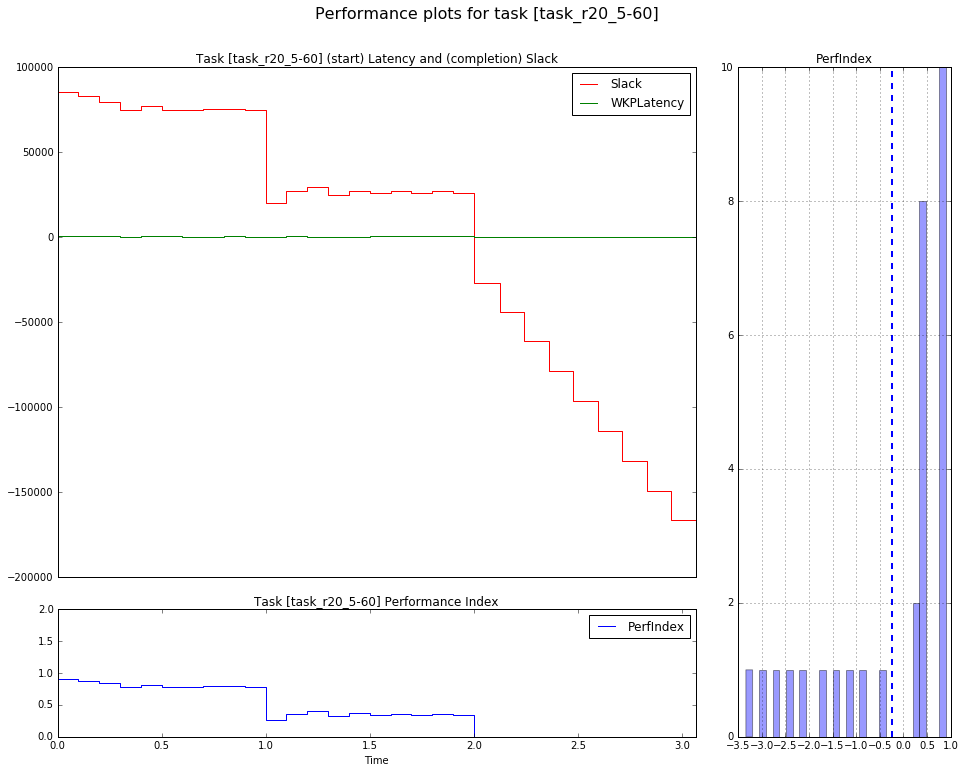

In [13]:
# Support for performance analysis of RTApp workloads
from perf_analysis import PerfAnalysis

# Parse the RT-App generate log files to compute performance metrics
pa = PerfAnalysis(res_dir)

# For each task which has generated a logfile, plot  its performance metrics
for task in pa.tasks():
    pa.plotPerf(task, "Performance plots for task [{}] ".format(task))